1.Use the given code and modify for IRIS dataset. Implement the SVM classifier in Python (make use of
scikit-learn library). Apply the linear kernel function. Plot the scatter plot of the input features. Plot the
decision boundary.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
clf = svm.SVC(kernel='linear').fit(X, y)

Text(0.5, 1.0, 'SVM with Linear Kernel on Iris Dataset')

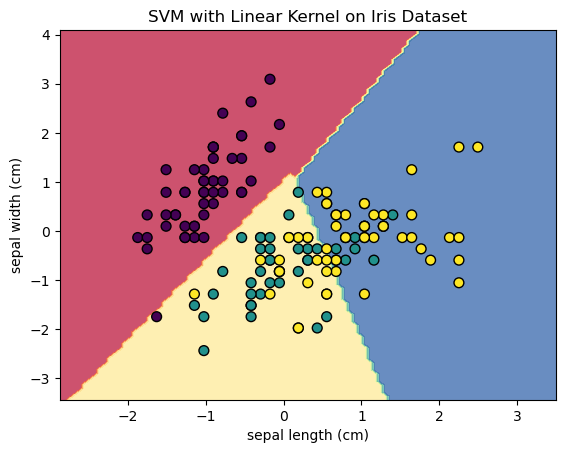

In [5]:
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors="k")
plt.title("SVM with Linear Kernel on Iris Dataset")
# plt.show()

2. Construct a simple SVM classifier that separates the two classes:
Positively labeled data points: (4, 1), (4, -1), (6, 0)
Negatively labeled data points: (1, 0), (0, 1), (0, -1)
For all negatively labeled points, the output is -1, and for all positively labeled points, the output is 1.
Implement the python function program to draw the hyperplane that separates the two classes using scikit-
learn library. Plot the scatter plot of the input features.

In [6]:
X = np.array([[4, 1], [4, -1], [6, 0], [1, 0], [0, 1], [0, -1]])
y = np.array([1, 1, 1, -1, -1, -1])

In [7]:
clf = svm.SVC(kernel='linear').fit(X, y)

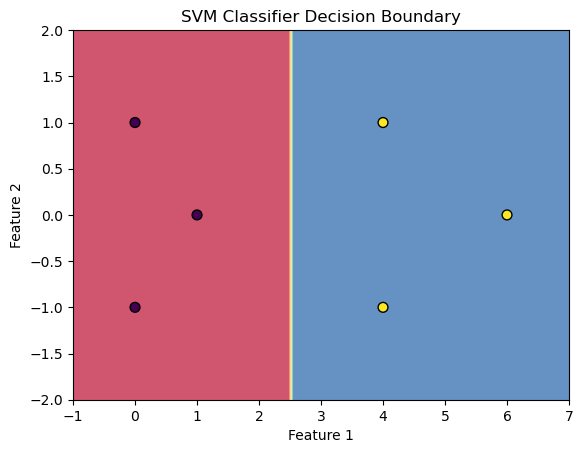

In [8]:
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel='Feature 1',
    ylabel='Feature 2',
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors="k")
plt.title("SVM Classifier Decision Boundary")
plt.show()

3. Solve Qn (2) manually in your Observation book and implement without using scikit-learn library.

In [9]:
def svm_hyperplane(X, y):
    X_pos = X[y == 1]
    X_neg = X[y == -1]
    
    mean_pos = np.mean(X_pos, axis=0)
    mean_neg = np.mean(X_neg, axis=0)
    
    weights = mean_pos - mean_neg
    
    bias = -0.5 * (np.dot(weights, mean_pos) + np.dot(weights, mean_neg))
    
    return weights, bias

In [10]:
weights, bias = svm_hyperplane(X, y)

In [11]:
xx = np.linspace(-1, 7, 100)
yy = -(weights[0] * xx + bias) / (weights[1] +1e6)

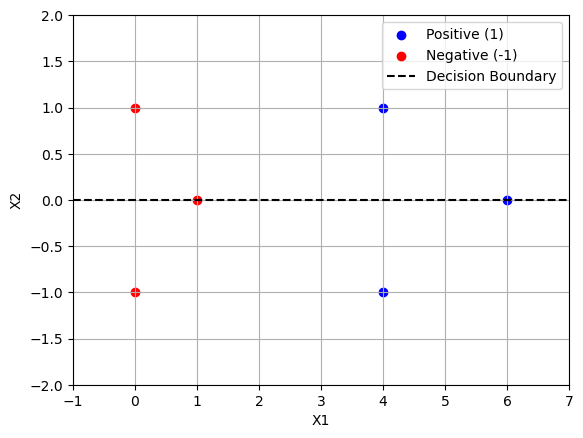

In [12]:
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Positive (1)')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Negative (-1)')
plt.plot(xx, yy, 'k--', label='Decision Boundary')
plt.xlim(-1, 7)
plt.ylim(-2, 2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.legend()
plt.show()

4. Develop a Python function program to sketch the hyperplane 1 + 2X1 + 3X2 = 0 without using scikit-
learn library. Indicate the set of points for which 1 + 3X1 − X2 > 0, 1 + 3X1 − X2 < 0 and 1 + 3X1 − X2=0.
Take x1, x2 ∈ (-10, 10). Plot the graph for every +/- 1 increment. Find the slope and intercept. Solve
manually in your Observation book. Compare your results with manual results.

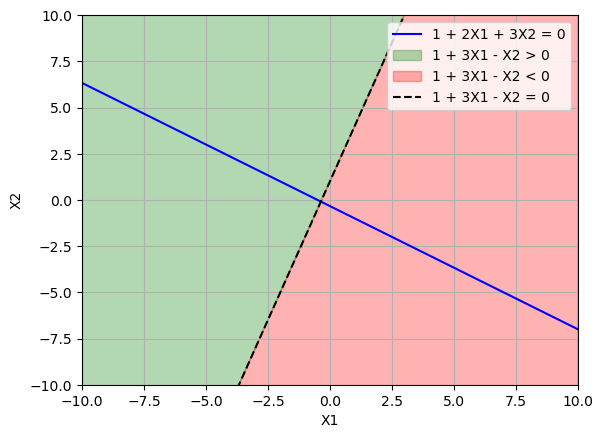

In [13]:
x1 = np.linspace(-10, 10, 100)
x2_hyperplane = (-1 - 2 * x1) / 3
x2_region = 1 + 3 * x1 

plt.plot(x1, x2_hyperplane, 'b', label='1 + 2X1 + 3X2 = 0')
plt.fill_between(x1, x2_region, 15, where=(x2_region < 15), color='green', alpha=0.3, label='1 + 3X1 - X2 > 0')
plt.fill_between(x1, -15, x2_region, where=(x2_region > -15), color='red', alpha=0.3, label='1 + 3X1 - X2 < 0')
plt.plot(x1, x2_region, 'k--', label='1 + 3X1 - X2 = 0')


plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()

5. Given two hyperplanes for SVM classifier 1 and SVM classifier 2, find the best hyperplane corresponding
to the classifier:

        a. 5+2x1+5x2

        b. 5+20x1+50x2

    Implement Python function program to draw the hyperplane that separates the two classes (without scikit-
    learn library). Plot the scatter plot of the input features. Indicate the set of points for which

    5+2*x1+ 5*x2 > 0 and

    5+2*x1+ 5*x2 <0,

    5+2*x1+ 5*x2 = 0

    On the same plot, Indicate the set of points for which

    5+20*x1+50*x2 > 0 and

    5+20*x1+50*x2 < 0,

    5+20*x1+50*x2 =0.

    Find the slope and intercept. Solve manually in your Observation book. Compare your results with manual
    results.

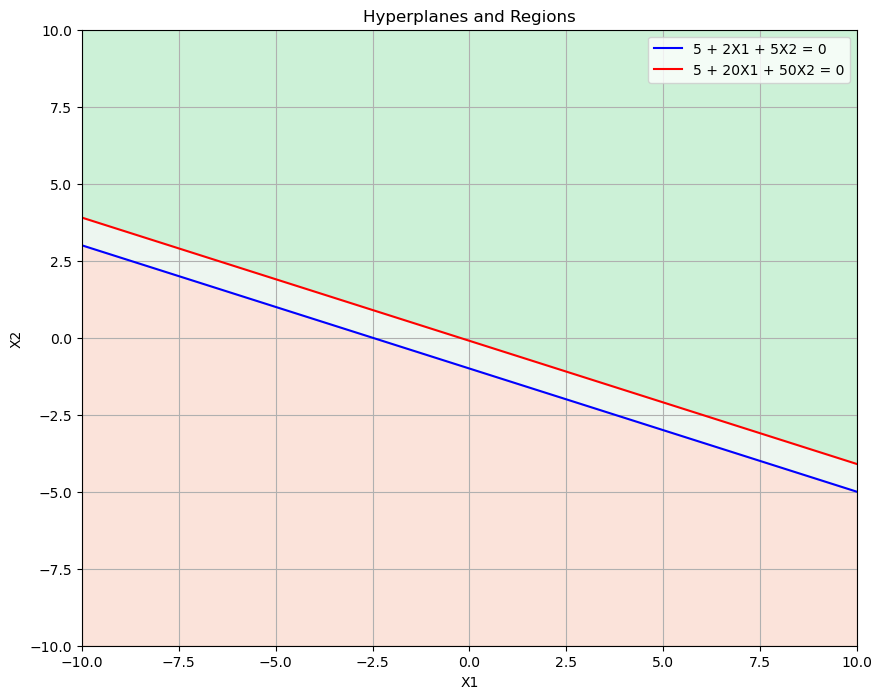

In [14]:
x1 = np.linspace(-10, 10, 100)
x2_hyperplane1 = (-5 - 2 * x1) / 5
x2_hyperplane2 = (-5 - 20 * x1) / 50

plt.figure(figsize=(10, 8))

plt.plot(x1, x2_hyperplane1, 'b', label='5 + 2X1 + 5X2 = 0')
plt.plot(x1, x2_hyperplane2, 'r', label='5 + 20X1 + 50X2 = 0')

plt.fill_between(x1, x2_hyperplane1, 10, where=(x2_hyperplane1 < 10), color='lightblue', alpha=0.3)
plt.fill_between(x1, -10, x2_hyperplane1, where=(x2_hyperplane1 > -10), color='lightcoral', alpha=0.3)
plt.fill_between(x1, x2_hyperplane2, 10, where=(x2_hyperplane2 < 10), color='lightgreen', alpha=0.3)
plt.fill_between(x1, -10, x2_hyperplane2, where=(x2_hyperplane2 > -10), color='lightyellow', alpha=0.3)


plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Hyperplanes and Regions')
plt.legend()
plt.grid()